# Non-Linear Models and Validation Metrics


### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.


### Step 0: Import Libraries


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression

For this section, we will be continuing with the concrete example from yellowbrick.


### Step 1: Data Input

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.


In [59]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete()

### Step 2: Data Processing

Data processing was completed in the previous assignment. No need to repeat here.


### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`


### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)


### Step 5: Visualize Results

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`


In [60]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Verify training and testing data have the same number of data points
# print(X_train.shape)
# print(y_train.shape)

results = pd.DataFrame(index=["DT", "RF", "GB"], columns=[
                       "Training Accuracy", "Validation Accuracy"])

# Decision Tree
tree = DecisionTreeRegressor(random_state=0, max_depth=5)

# Random Forest
forest = RandomForestRegressor(random_state=0, max_depth=5)

# Gradient Boosting
gbrt = GradientBoostingRegressor(random_state=0, max_depth=5)

classification = (tree, forest, gbrt)
i = 0
for reg in classification:
    # Only use training data for cross-validation
    score = cross_validate(
        reg, X_train, y_train, scoring='neg_mean_squared_error', return_train_score=True)
    training_accuracy = score['train_score'].mean()*-1
    validation_accuracy = score['test_score'].mean()*-1
    results.iloc[i] = [training_accuracy, validation_accuracy]
    i = i+1

results

,Training Accuracy,Validation Accuracy
DT,47.279761,73.447331
RF,29.576135,45.052441
GB,3.37944,22.819636


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`


In [61]:
i = 0
for reg in classification:
    score = cross_validate(reg, X_train, y_train,
                           scoring='r2', return_train_score=True)
    training_accuracy = score['train_score'].mean()
    validation_accuracy = score['test_score'].mean()
    results.iloc[i] = [training_accuracy, validation_accuracy]
    i = i+1
results

,Training Accuracy,Validation Accuracy
DT,0.834465,0.738697
RF,0.896561,0.840951
GB,0.988171,0.919348


### Questions (6 marks)

1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

_ANSWER HERE_

1. In the previous assignment, using a linear model, we saw that the MSE score was 111.36 training and 95.90 testing. The linear model performed much worse than any of the non-linear methods where our MSE training values ranged from 47.3(DT) to 3.4(GB) and our MSE validation values ranged from 73.4 (DT) to 22.8 (GB). This is a significant improvement and suggests the concrete data better fits a non-linear model. For the R2 evaluation, the linear model had training accuracy of 0.61 and validation accuracy of 0.62. We believed this was poor fit of the model and suggested underfitting. With the non-linear models, we see training accuracy from 0.83 (DT) to 0.99 (GB) and validation accuracy from 0.74 (DT) to 0.92 (GB). These values are a great improvement and the lower validation score than training score suggests the models are no longer underfitting the data.

2. I would select the Gradient Boosting model for this dataset. Out of all the models, the gradient boosting performed the best in both the MSE and R2 analysis.

    The MSE on the training and validation sets for gradient boosting were lower than the other sets (13.0 training score and 28.5 validation score for gradient boosting vs 29.6 training score and 45.1 validation score for the random forest regression). An ideal MSE score would be zero so the lower score is "better" and the gradient boosting model is closer to zero than both the random forest and decision tree models.

    A perfect R2 score is 1.0 so we are looking for the highest R2 score to indicate the bets fit for the model. Graident boosting has a 0.95 training score and 0.90 validation score and the next closest score was random forest model with 0.89 training score and 0.84 validation score. These values indicate that the gradient boosting model is a good fit for the concrete data.

3. To increase the accuracy of the tree-based models, I would:

    a. add max_leaf_nodes parameter.

    Adding maximum leaf nodes parameter works in a similar way to restricting the depth of the tree to reduce the likelihood of achieving pure leaves in a way that would allow for the complexity of the model to increase where it is truly needed while restricting the model from completely overfitting.

    b. increase the size of the dataset / collect more data

    Increasing the dataset may increase accuracy as more varied data points would allow for a better fit of the model to the data. This dataset has only 1030 data points and 8 features (plus one target feature) and this non-linear relationship may benefit from more points or more features to better model the relationship.


### Process Description

Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:

1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?


_DESCRIBE YOUR PROCESS HERE_

1.  Sourced code from:

-   course notes, course jupyter notebooks
-   course textbook (Introduction to Machine Learning with Python).
-   sklearn website: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
-   stack overflow, DataConversionWarning: https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected

2. Completed the steps in the order written as instructed. Steps:

-   data input - load concrete dataset
-   ML model and validation

    -   applied a Decision Tree model and calculated training and validation scores using .score
    -   applied Random Forest model and calculated training and validation scores using .score
    -   applied Gradient Boosting model and realized that we wanted MSE accuracy score not R2 as provided in .score.
    -   replaced decision tree and random forest training and validation accuracy score calculations with negative MSE cross-validation scoring.
    -   calculated the mean of the train_score and test_score of the cross validation as default parameters performs 3-fold cross validation producing a list of three accuracy scores for the one model. The mean represents the average of these three accuracy scores.
    -   applied Gradient Boosting model and calculated training and validation scores using cross-validation and negative MSE scoring.
    -   created loop for duplicate calculations and deleted redundant code

3. Did not use generative AI.
4. Challenged by my own reading comprehension. Textbook uses classification for their examples and the question was for regression models. It took a minute to figure out if the heading in the assignment was wrong or if we were actually doing regression in this part.


## Part 2: Classification

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:


### Step 1: Data Input

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`


In [62]:
# TO DO: Import wine dataset

# Followed the import in python instructions for the dataset shown when following the above link.
# pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets  # y target vector is the class column

print(f"The size of X is: {X.shape} and is of type {type(X)}")
print(f"The size of y is: {y.shape} and is of type {type(y)}")

The size of X is: (178, 13) and is of type <class 'pandas.core.frame.DataFrame'>
The size of y is: (178, 1) and is of type <class 'pandas.core.frame.DataFrame'>


### Step 2: Data Processing


Print the first five rows of the dataset to inspect:


In [63]:
# TO DO: ADD YOUR CODE HERE
X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values


In [64]:
# TO DO: ADD YOUR CODE HERE
print(X.isna().sum())  # no missing values in the dataset
print(f"\nThere are {X.isna().sum().sum()} missing values in the dataset.")

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

There are 0 missing values in the dataset.


How many samples do we have of each type of wine?


In [65]:
# TO DO: ADD YOUR CODE HERE
samples = y.value_counts()
for i, j in samples.items():
    print("There are {} samples of class {} wine. ".format(j, *i))

There are 71 samples of class 2 wine. 
There are 59 samples of class 1 wine. 
There are 48 samples of class 3 wine. 


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`


### Step 4: Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`


### Step 5: Visualize Results

#### Step 5.1: Compare Models

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`


In [66]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

results = pd.DataFrame(index=["SVC", "DT"], columns=[
                       "X Size", "y Size", "Training Accuracy", "Validation Accuracy"])

# split data to keep the testing data completely separate from the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# SVC
svc = SVC()

# Decision Tree
tree = DecisionTreeClassifier(random_state=0, max_depth=3)

classification = (svc, tree)

i = 0
for reg in classification:
    score = cross_validate(reg, X_train, y_train.values.ravel(
    ), scoring='accuracy', return_train_score=True)
    training_accuracy = score['train_score'].mean()
    validation_accuracy = score['test_score'].mean()
    results.iloc[i] = [X_train.shape, y_train.shape,
                       training_accuracy, validation_accuracy]
    i = i+1
results

,X Size,y Size,Training Accuracy,Validation Accuracy
SVC,"(133, 13)","(133, 1)",0.680427,0.676638
DT,"(133, 13)","(133, 1)",0.994357,0.894017


#### Step 5.2: Visualize Classification Errors

Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:


In [67]:
# TO DO: Implement best model
from sklearn.metrics import confusion_matrix

# fit the model
tree.fit(X_train, y_train)

# predict the target for the test data
tree_pred = tree.predict(X_test)

# create confusion matrix comparing test values and predicted values.
cf = confusion_matrix(y_test, tree_pred)
cf

array([[14,  2,  0],
       [ 0, 20,  1],
       [ 0,  0,  8]])

<Axes: >

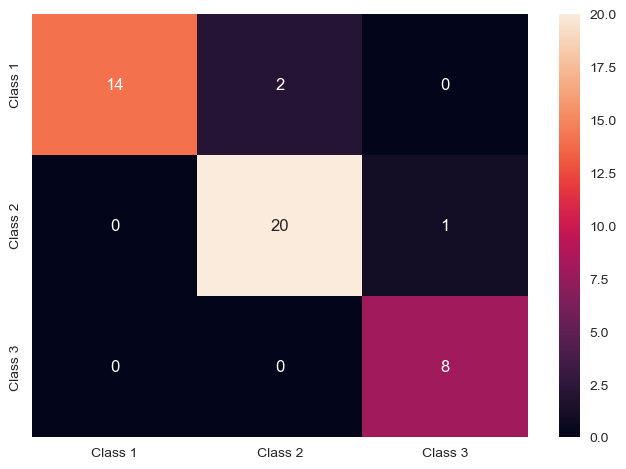

In [68]:
# TO DO: Print confusion matrix using a heatmap
labels = ["Class 1", "Class 2", "Class 3"]
sns.heatmap(cf, annot=True, xticklabels=labels, yticklabels=labels)

In [69]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_pred,
      target_names=["Class 1", "Class 2", "Class 3"]))

              precision    recall  f1-score   support

     Class 1       1.00      0.88      0.93        16
     Class 2       0.91      0.95      0.93        21
     Class 3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Questions

1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2?
1. In this case, is maximizing precision or recall more important? Why?

_YOUR ANSWERS HERE_

1. Accuracy for the decision tree was higher than the accuracy for SVC for both the training and validation values.
   Decision tree had the higher training and validation scores at 0.99 and 0.89 suggesting it is a good fit. SVC had training and validation scores of 0.68 and 0.68 suggesting it is underfitting the data.

2. Support vector machines model did not work as well as the tree-based model because:
   a. SVM models equire careful preprocessing of the data and tuning of the parameters which was not performed for this dataset. The model may produce better accuracy scores if multiple models were created using an iterative process tuning the C and gamma parameters.
   b. Tree based models work very well at classifying distinct features that don't require normalzation or standardization pre-processing.

3. 3 samples were incorrectly classified out of 45 total test samples in step 5.2.

4. In this case, maximizing precision is more important because it is more important limit the number of false positives (saying a sample DOES belong to a class when it doesn't). We would want to have high precision on predicting the class of wine to limit mistakes but also because the consequences of a false negative (saying a wine DOES NOT belong to a class when it does) are very low if the model does not predict correctly.


### Process Description

Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:

1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?


_DESCRIBE YOUR PROCESS HERE_

1.  Sourced code from:

-   course notes, course jupyter notebooks
-   course textbook (Introduction to Machine Learning with Python).
-   pandas website, series objects: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
-   stack overflow, unpack series for iteration: https://stackoverflow.com/questions/50267185/iterate-over-pandas-series
-   stack overflow, DataConversionWarning: https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected

2. Completed the steps in the order written as instructed. Steps:

-   data input - load wine dataset
-   ML model and validation
    -   applied a SVC model
    -   applied Decision Tree model
    -   reused the loop from previous part
    -   fit the model to the decision tree as it had higher validation and training scores
    -   predicted the y_test values using .fit()
    -   created confusion matrix
    -   plotted heatmap
    -   printed classification report

3. Did not use generative AI.
4. No challenges. The course notes, example jupyter notebooks, and textbook were very helpful.


## Part 3: Observations/Interpretation

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

_ADD YOUR FINDINGS HERE_

For regression, the ensemble regression trees performed better than the single decision tree (validation accuracy of 0.89 GB, 0.84 RF vs 0.73 DT) due to the combination of the intsertion of randomness in the random forests and the serialization of models in gradient boosting. A model composed of multiple models better fits in terms of accuracy on data that hasn't been seen before. We saw this in the lectures that the gradient boosting improves upon earlier iterations and the random forest is built upon randomness samples or features and merges the best results together. These ensemble models would perform better accuracy and would overfit less than the model based upon one iteration of the dataset.

For classification, the decision tree model out performed the SVC model (validation accuracy of 0.89 DT vs 0.67 SVC). This supports the conclusions in class that the SVC model requires careful tuning of the C and gamma parameters, none of which was done in this assignment therefore we cannot know if the SVC is an adequate model choice or if we simply didn't find the right set of parameters for the best accuracy in the model.


## Part 4: Bonus Question

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?


In [70]:
# TO DO: ADD YOUR CODE HERE
from sklearn.svm import SVC, LinearSVC

bonus_results = pd.DataFrame(index=["SVC", "Linear SVC"], columns=[
                             "Training Accuracy", "Validation Accuracy"])

# split data to keep the testing data completely separate from the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# SVC
svc = SVC()

# LineraSVC
svc_lin = LinearSVC(max_iter=5000)

classification = (svc, svc_lin)

i = 0
for model in classification:
    model.fit(X_train, y_train)
    score = cross_validate(model, X_train, y_train.values.ravel(
    ), cv=5, scoring='accuracy', return_train_score=True)
    training_accuracy = score['train_score'].mean()
    validation_accuracy = score['test_score'].mean()
    bonus_results.iloc[i] = [training_accuracy, validation_accuracy]
    i = i+1
bonus_results

/Users/jennbushey/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jennbushey/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jennbushey/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/jennbushey/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, incre

,Training Accuracy,Validation Accuracy
SVC,0.680427,0.676638
Linear SVC,0.889296,0.863533


_ANSWER HERE_

The results for the SVC model are the same as we did not change anything about the way SVC was calculated.

The LinearSVC model has training accuracy of 0.99 and validation accuracy of 0.98. These values are significant improvement over the SVC model (training 0.68, validation 0.68) and the decision tree model (training 0.99, validation 0.89). This is likely due to the dataset being classified more easily by linear hyperplanes than the non-linear hyperplanes of SVC or the if/else style classification present in decision tree models.

The Linear SVC is not a good fit for the dataset as the maximum iterations were reached.
